#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [1]:
!pip install numpy pandas scikit-learn wandb


In [2]:
import wandb
wandb.login(key="571054aed5beb99498042a2d4c5d2fbe72caf7f3")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: aarav-luthra-ug23 (aarav-luthra-ug23-plaksha-university). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [4]:
## import cv2
## import numpy
## import matplotlib pyplot
## import KMeans cluster from sklearn
## import distance from scipy.spatial
import cv2  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans  
from scipy.spatial import distance  
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

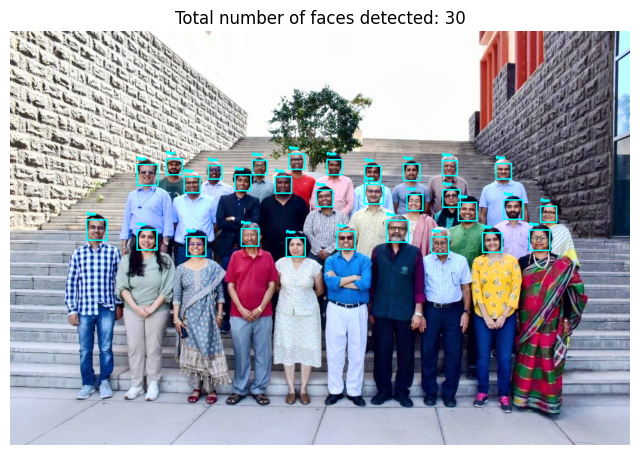

In [17]:
## Reading the image plaksha_Faculty.jpg

img = cv2.imread('/kaggle/input/ml-lab/Plaksha_Faculty.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Face" ## The text you want to write
font = 	cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.25  ## Font scale factor
font_color = (0, 255, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 2  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(rgb_img, (x, y), (x+w, y+h), (0, 255, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(rgb_img, text, (x, y - 10), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"
plt.figure(figsize=(8, 6))
plt.imshow(rgb_img)  # Convert BGR to RGB for proper display
plt.title(f"Total number of faces detected: {len(faces_rect)}")
plt.axis("off")
plt.savefig('Faces.jpg')
plt.show()

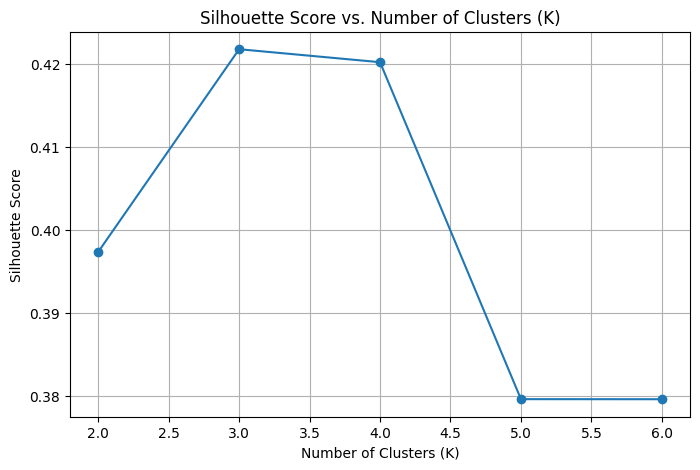

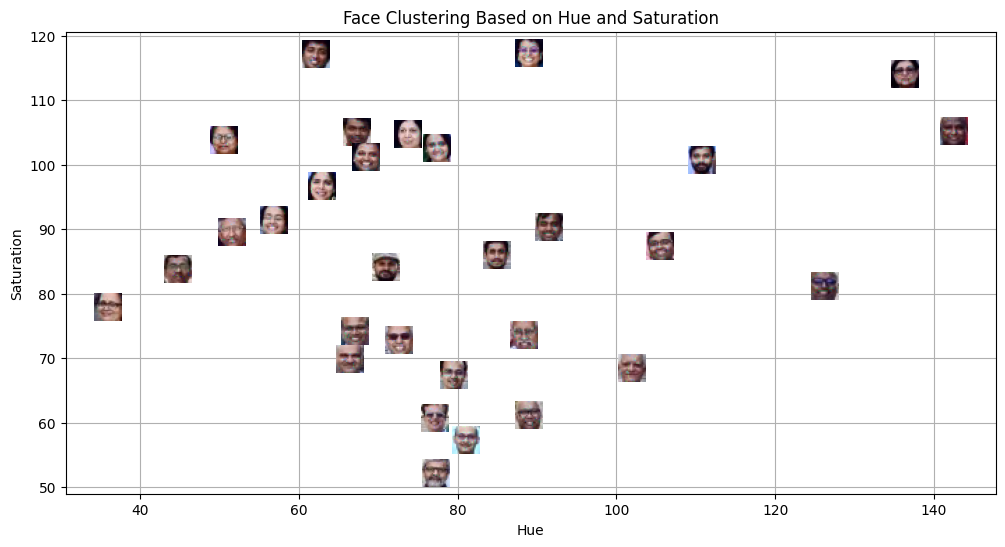

In [30]:
from sklearn.metrics import accuracy_score, log_loss, silhouette_score, confusion_matrix
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)
silhouette_scores = {}
## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters = 2, random_state = 45, n_init = 20).fit(hue_saturation)
for k in range(2, 7):  # Try K values from 2 to 6
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20).fit(hue_saturation)
    silhouette = silhouette_score(hue_saturation, kmeans.labels_)
    silhouette_scores[k] = silhouette

plt.figure(figsize=(8, 5))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker="o", linestyle="-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters (K)")
plt.grid(True)
plt.savefig("silhouette_scores.png")
wandb.log({"Silhouette Score Plot": wandb.Image("silhouette_scores.png")})

if len(true_labels) == len(kmeans.labels_):
    cm = confusion_matrix(true_labels, kmeans.labels_)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("K-Means Confusion Matrix")
    plt.savefig("confusion_matrix.png")
    wandb.log({"Confusion Matrix": wandb.Image("confusion_matrix.png")})
# centroids = kmeans.cluster_centers_
# labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))


# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Face Clustering Based on Hue and Saturation")
## Put grid
plt.grid(True)
## show the plot
plt.savefig("clustering_HSV.jpg")
plt.show()

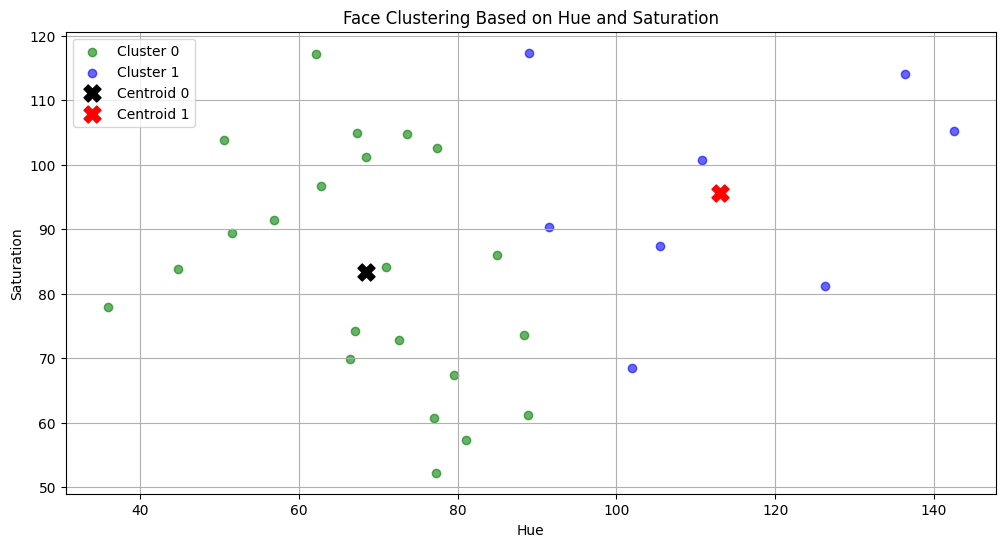

In [8]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label="Cluster 0", alpha=0.6)


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label="Cluster 1", alpha=0.6)
# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], color='black', marker='X', s=150, label="Centroid 0")
plt.scatter(centroid_1[0], centroid_1[1], color='red', marker='X', s=150, label="Centroid 1")

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Face Clustering Based on Hue and Saturation")
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
## Show the plot
plt.savefig("cluster_plot.png")
wandb.log({"Cluster Visualization": wandb.Image("cluster_plot.png")})
plt.show()

plt.show()

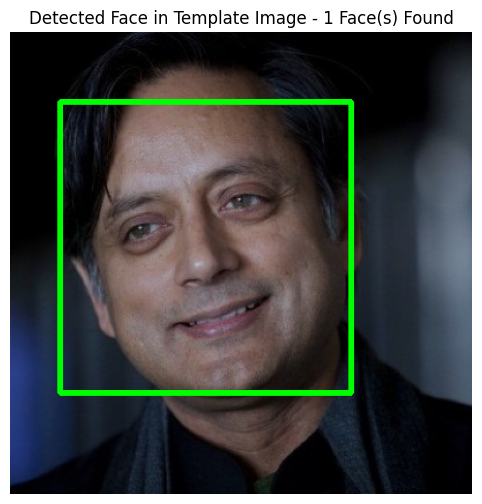

In [9]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('/kaggle/input/ml-lab/Dr_Shashi_Tharoor.jpg')
# Detect face  in the template image after converting it to gray and store it in template_faces
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct colors
plt.title(f"Detected Face in Template Image - {len(template_faces)} Face(s) Found")
plt.axis("off")  # Hide axes
plt.show()      

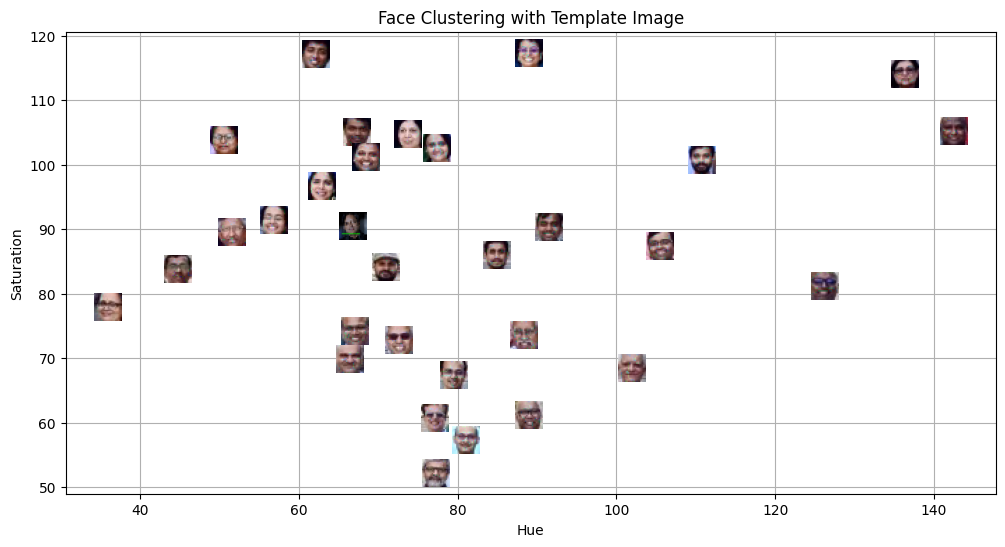

In [10]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])	
template_saturation = np.mean(template_hsv[:, :, 1])	

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]	

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel("Hue")	
## Put y label
plt.ylabel("Saturation")	
## Put title
plt.title("Face Clustering with Template Image")	
## Add grid
plt.grid(True)	
## show plot
plt.show()	

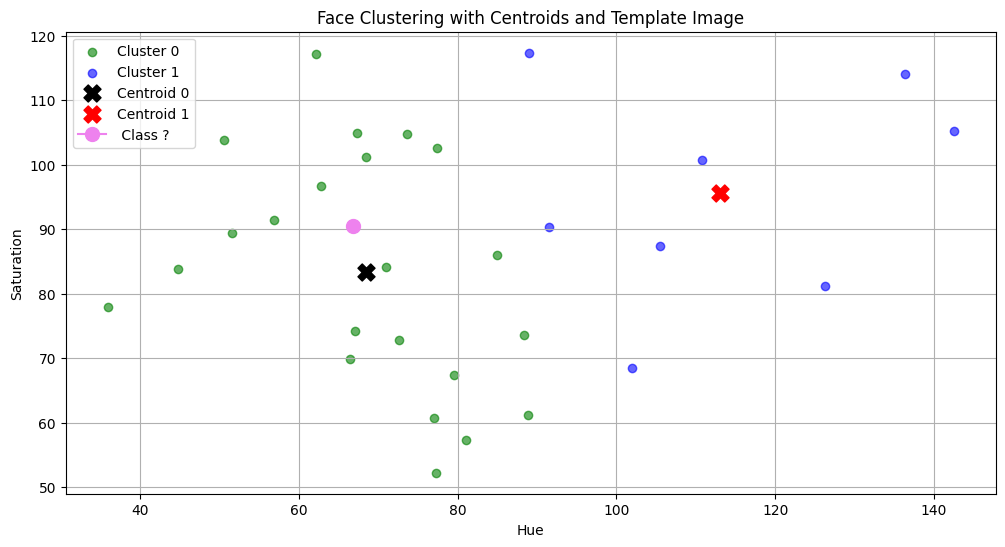

In [11]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label="Cluster 0", alpha=0.6)

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label="Cluster 1", alpha=0.6)

# Calculate and plot centroids for both the clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]	
plt.scatter(centroid_0[0], centroid_0[1], color='black', marker='X', s=150, label="Centroid 0" ) ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], color='red', marker='X', s=150, label="Centroid 1")  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

## Put x label
plt.xlabel("Hue")	
## Put y label
plt.ylabel("Saturation")	
## Put title
plt.title("Face Clustering with Centroids and Template Image")	
## Add a legend
plt.legend()	
## Add grid
plt.grid(True)	
## show the plot
plt.savefig('Clustering_HSV_with_template_points.jpg')
plt.show()	
                                            ## End of the lab 5 ##

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


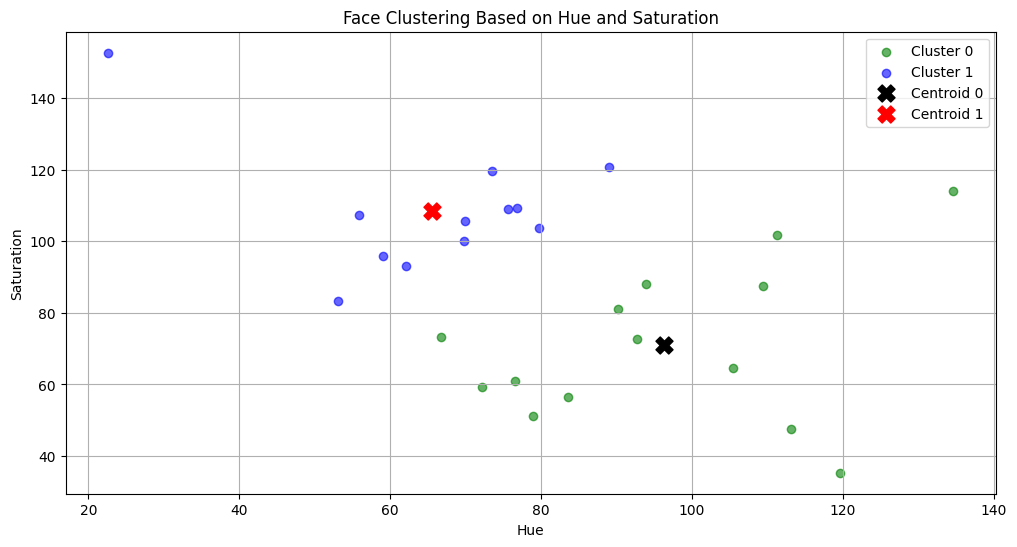

In [12]:
import wandb
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

wandb.init(project="distance_classification_project", name="KMeans_Clustering")
wandb.config.num_clusters = 2

img = cv2.imread('/kaggle/input/ml-lab/Plaksha_Faculty.jpg')
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces_rect = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

hue_saturation = []
true_labels = []  

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))

hue_saturation = np.array(hue_saturation)
kmeans = KMeans(n_clusters=wandb.config.num_clusters, random_state=42).fit(hue_saturation)
predicted_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

if len(true_labels) == len(predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    loss = log_loss(true_labels, predicted_labels)
    wandb.log({"KMeans Accuracy": accuracy, "KMeans Loss": loss})

    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("K-Means Confusion Matrix")
    plt.savefig("confusion_matrix.png")
    wandb.log({"Confusion Matrix": wandb.Image("confusion_matrix.png")})

cluster_0_points = []
cluster_1_points = []

fig, ax = plt.subplots(figsize=(12, 6))

for i, (hue, sat) in enumerate(hue_saturation):
    if predicted_labels[i] == 0:
        cluster_0_points.append((hue, sat))
    else:
        cluster_1_points.append((hue, sat))

cluster_0_points = np.array(cluster_0_points)
cluster_1_points = np.array(cluster_1_points)

plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label="Cluster 0", alpha=0.6)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label="Cluster 1", alpha=0.6)
plt.scatter(centroids[0, 0], centroids[0, 1], color='black', marker='X', s=150, label="Centroid 0")
plt.scatter(centroids[1, 0], centroids[1, 1], color='red', marker='X', s=150, label="Centroid 1")

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Face Clustering Based on Hue and Saturation")
plt.legend()
plt.grid(True)



## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

Ans: 
- Euclidean Distance – Measures straight-line distance (most used in KNN).
- Manhattan Distance – Sums the absolute differences between coordinates (useful for grid-based data).
- Minkowski Distance – A generalized form of Euclidean and Manhattan distances.
- Cosine Similarity – Measures the angle between two vectors (common in text classification).

#### 2. What are some real-world applications of distance-based classification algorithms? 

Ans:
- Medical Diagnosis – Identifying diseases by comparing patient symptoms to past cases.
- Recommendation Systems – Finding similar users or products based on preferences.
- Image Recognition – Classifying objects by comparing image feature vectors.
- Anomaly Detection – Identifying fraud or unusual patterns in financial transactions.

#### 3. Explain various distance metrics. 

Ans:
- Euclidean Distance – Measures the direct straight-line distance between two points in space.
- Manhattan Distance – Measures distance by summing absolute differences (best for grid-based movement).
- Minkowski Distance – A flexible distance metric that generalizes both Euclidean and Manhattan.
- Hamming Distance – Counts differing elements in two binary sequences (used in text and genomics).
- Cosine Similarity – Measures the angle between two vectors rather than magnitude (used in NLP).

#### 4. What is the role of cross validation in model performance? 

Ans:
- Reduces overfitting by testing the model on unseen data.
- K-Fold Cross-Validation is the most common method, splitting data into K subsets, training on K-1, - and testing on the remaining fold.
- Helps in choosing the best hyperparameters by evaluating different settings across folds.

#### 5. Explain variance and bias in terms of KNN? 

Ans:
Variance measures how much the model’s predictions change with different data. A low K value makes KNN too sensitive to small variations, leading to high variance (overfitting).